In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic_survival = pd.read_csv("titanic-survival.csv")
titanic_survival.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Prix moyen des billes par classe

In [31]:
import numpy as np
passenger_class_fares = titanic_survival.pivot_table(index="pclass", values="fare", aggfunc=np.mean)

In [32]:
passenger_class_fares

,fare
pclass,
1.0,87.508992
2.0,21.179196
3.0,13.302889


#### Calcul de la moyenne d'age par classe

In [33]:
passenger_age = titanic_survival.pivot_table(index="pclass", values="age", aggfunc=np.mean)
print(passenger_age)

              age
pclass           
1.0     39.159918
2.0     29.506705
3.0     24.816367


#### Pourcentage de survie par classe

In [34]:
passenger_survive = titanic_survival.pivot_table(index="pclass", values="survived")
passenger_survive

,survived
pclass,
1.0,0.619195
2.0,0.429603
3.0,0.255289


#### Statistiques nombre survivant et dépense par port d'embarquation

In [35]:
port_stats = titanic_survival.pivot_table(index="embarked", values=["fare", "survived"], aggfunc=np.sum)
print(port_stats)

                fare  survived
embarked                      
C         16830.7922     150.0
Q          1526.3085      44.0
S         25033.3862     304.0


#### Suppression des lignes avec valeur manquantes pour les colonnes 'age' et 'sex'

In [36]:
new_titanic_survival = titanic_survival.dropna(axis=0, subset=["age", "sex"])
new_titanic_survival.shape

(1046, 14)

#### Reindexation du daframe new_titanic_survival

In [37]:
titanic_reindexed = new_titanic_survival.reset_index(drop=True)
titanic_reindexed.iloc[0:5, 0:3]

,pclass,survived,name
0,1.0,1.0,"Allen, Miss. Elisabeth Walton"
1,1.0,1.0,"Allison, Master. Hudson Trevor"
2,1.0,0.0,"Allison, Miss. Helen Loraine"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


### Ajout de la colonne age_labels

In [38]:
def age_label(row):
    age = row["age"]
    if pd.isnull(age):
        return "Unknow"
    elif age < 18:
        return "Minor"
    else:
        return "Adult"

age_labels = new_titanic_survival.apply(age_label, axis=1)
new_titanic_survival["age_labels"] = age_labels
new_titanic_survival.head()

C:\Users\Edooby\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_labels
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Adult
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Minor
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Minor
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Adult
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Adult


#### Pourcentage de survie par groupe d'âge

In [39]:
titanic_survival["age_labels"] = age_labels
titanic_survival.head()
age_group_survival = new_titanic_survival.pivot_table(index="age_labels", values="survived")
age_group_survival

,survived
age_labels,
Adult,0.387892
Minor,0.525974


#### Pourcentage de Survie par sexe

In [40]:
sex_group_survival = new_titanic_survival.pivot_table(index="sex", values="survived")
sex_group_survival

,survived
sex,
female,0.752577
male,0.205167


In [157]:
### Check valeur nulle
pd.isnull(new_titanic_survival).sum()
print(new_titanic_survival.fare.mean())

36.68638040152977


In [151]:
# Clean valeur null 
new_titanic_survival.fare.fillna(37, inplace=True)
pd.isnull(new_titanic_survival).sum()


C:\Users\Edooby\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin         774
embarked        2
boat          629
body          926
home.dest     361
age_labels      0
dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
new_titanic_survival.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_labels
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Adult
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Minor
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Minor
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Adult
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Adult


In [64]:
X = new_titanic_survival[["pclass", "survived", "age", "fare"]]
Y = new_titanic_survival.sex

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=5)

In [66]:
new_titanic_survival.groupby("sex").size()

sex
female    388
male      658
dtype: int64

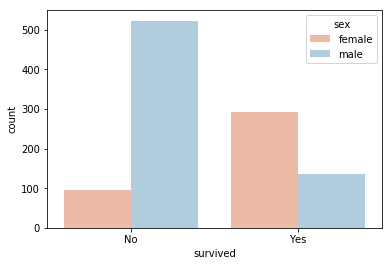

In [67]:
plt.figure()
sns.countplot(x='survived', hue='sex', data=new_titanic_survival, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [68]:
### Modèle KNN k = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
### Predictions
predictions = knn.predict(X_test)
predictions[:5]

array(['male', 'female', 'female', 'female', 'male'], dtype=object)

In [70]:
### Score
score = knn.score(X_test, Y_test)
print("Score du modele knn = 5", score)

Score du modele knn = 5 0.6904761904761905


In [71]:
### Matrice de confusion
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, predictions)
print("Matrice de confusion knn = 5 : \n",matrix)


Matrice de confusion knn = 5 : 
 [[ 38  26]
 [ 39 107]]


In [72]:
#### Classification report
from sklearn.metrics import classification_report
print("Rapport de classification : \n", classification_report(Y_test, predictions))


Rapport de classification : 
              precision    recall  f1-score   support

     female       0.49      0.59      0.54        64
       male       0.80      0.73      0.77       146

avg / total       0.71      0.69      0.70       210



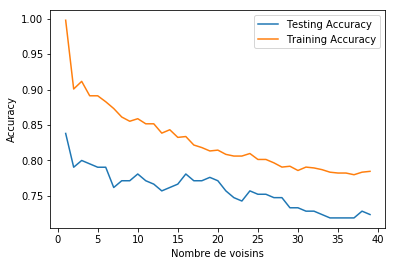

In [105]:
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, Y_train)
    
    train_accuracy[i] = knn.score(X_train, Y_train)

    test_accuracy[i] = knn.score(X_test, Y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.show()

On voit que le modèle n'est pas approprié et que le nombre de voisin optimal est de 5 pour un score avoisinant seulement les 70%

In [74]:
### Modèle SVM linéaire k = 8

from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X, Y, cv=8)
print(scores)
print("Moyenne des scores : ", scores.mean())

[0.59090909 0.65151515 0.88549618 0.75572519 0.86153846 0.67692308
 0.66923077 0.64615385]
Moyenne des scores :  0.7171864712895248


Le modèle SVM n'est pas beaucoup mieux car le meilleure score est de 0.71 pour 8 échantillons. Essayons un autre paramètre

In [82]:
scores = cross_val_score(svm, X, Y, cv=10)
print("Moyenne des scores : ", scores.mean())

Moyenne des scores :  0.683042071197411


Faire varier le nombre d'échantillon ne permet pas d'avoir un score plus élevé

In [83]:
### Nouvelle hypothèse nombre de survivant en fonction de la classe

In [93]:
X = new_titanic_survival[["survived", "age", "fare"]]
Y = new_titanic_survival.pclass

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=5)

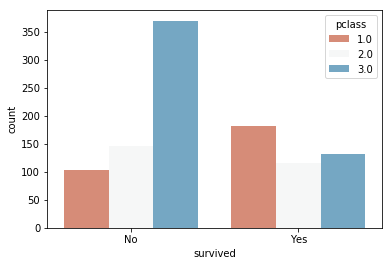

In [95]:
plt.figure()
sns.countplot(x='survived', hue='pclass', data=new_titanic_survival, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [96]:
new_titanic_survival.groupby("pclass").size()

pclass
1.0    284
2.0    261
3.0    501
dtype: int64

In [97]:
### Modèle KNN k = 5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
### Predictions
predictions = knn.predict(X_test)
predictions[:5]

array([2., 1., 3., 1., 3.])

In [99]:
### Score
score = knn.score(X_test, Y_test)
print("Score du modele knn = 5", score)

Score du modele knn = 5 0.7904761904761904


In [100]:
### Matrice de confusion
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test, predictions)
print("Matrice de confusion knn = 5 : \n",matrix)

Matrice de confusion knn = 5 : 
 [[45  7  2]
 [13 38  7]
 [ 3 12 83]]


In [101]:
#### Classification report
from sklearn.metrics import classification_report
print("Rapport de classification : \n", classification_report(Y_test, predictions))

Rapport de classification : 
              precision    recall  f1-score   support

        1.0       0.74      0.83      0.78        54
        2.0       0.67      0.66      0.66        58
        3.0       0.90      0.85      0.87        98

avg / total       0.79      0.79      0.79       210



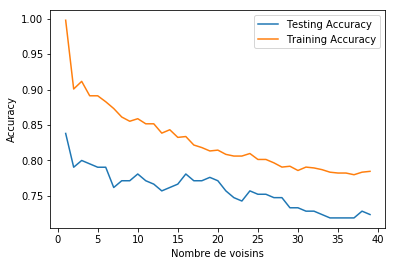

In [106]:
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, Y_train)
    
    train_accuracy[i] = knn.score(X_train, Y_train)

    test_accuracy[i] = knn.score(X_test, Y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Nombre de voisins')
plt.ylabel('Accuracy')
plt.show()

In [107]:
### Modèle SVM linéaire k = 8

from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train,Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [108]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X, Y, cv=8)
print(scores)
print("Moyenne des scores : ", scores.mean())

[0.71969697 0.81818182 0.65909091 0.61363636 0.70992366 0.70542636
 0.59689922 0.46511628]
Moyenne des scores :  0.6609964481491643


In [117]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm, X, Y, cv=15)
print("Moyenne des scores : ", scores.mean())

Moyenne des scores :  0.6499289570900824


In [210]:
#### Modèle Régression linéaire 

X = new_titanic_survival[["fare","pclass", "survived", "sex"]]
X.replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
X.replace(['male', 'female'], [0,1], inplace=True)
Y = new_titanic_survival.age
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

C:\Users\Edooby\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [211]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [212]:
# Entrainement du modèle
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [213]:
### Intercept
print("Intercept estimé : ", lm.intercept_)

Intercept estimé :  52.894344619182746


In [214]:
pd.DataFrame({'coefficients estimés': lm.coef_ }, index = X_train.columns)

,coefficients estimés
fare,-0.015335
pclass,-8.905674
survived,-5.495732
sex,-1.246791


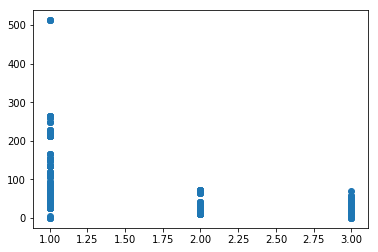

In [216]:
plt.scatter(new_titanic_survival.ag, new_titanic_survival.fare)
plt.show()

In [208]:
print("Prédictions : ", lm.predict(X_test)[:5])
print("Valeurs réelles : ", list(Y_test.head()))

Prédictions :  [0.04430624 0.61196899 0.25382478 0.3110973  0.12546703]
Valeurs réelles :  [0.0, 1.0, 0.0, 0.0, 0.0]


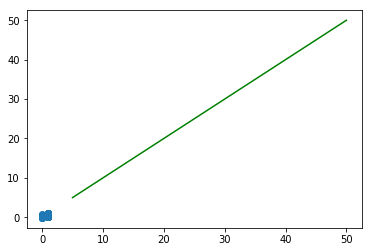

In [209]:
plt.scatter(Y_test, lm.predict(X_test))
x = np.linspace(5,50)
plt.plot(x,x,'g')

In [188]:
print("Coefficient de détermination des prédictions", lm.score(X_test, Y_test))

Coefficient de détermination des prédictions 1.0


In [197]:
from sklearn.metrics import mean_squared_error

print("Erreur quadratique moyenne: ", mean_squared_error(lm.predict(X_test), Y_test))

Erreur quadratique moyenne:  1784.065473787345


In [198]:
from sklearn.linear_model import Lasso

rl = Lasso(alpha=0.3)
rl.fit(X_train, Y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [199]:
pd.DataFrame({'coefficients estimés': rl.coef_ }, index = X_train.columns)

,coefficients estimés
survived,2.384040
pclass,-36.727871
age,-0.197536
sex,11.406757


In [200]:
print("Prédictions  lasso: ", rl.predict(X_test)[:5])
print("Prédictions regres: ", lm.predict(X_test)[:5])
print("Valeurs réelles : ", list(Y_test.head()))

Prédictions  lasso:  [-0.14779903 47.60536083  7.68781386 67.97446239  3.01278166]
Prédictions regres:  [-1.00389352 48.44860412  7.00399824 67.52471262  2.22617775]
Valeurs réelles :  [27.9, 23.0, 14.4, 221.7792, 7.4958]


Coefficient de détermination des prédictions 0.3575678787785087
Erreur quadratique moyenne:  1777.6586861358712


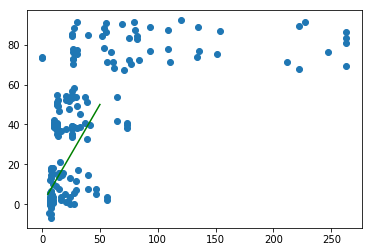

In [201]:
print("Coefficient de détermination des prédictions", rl.score(X_test, Y_test))
print("Erreur quadratique moyenne: ", mean_squared_error(rl.predict(X_test), Y_test))

plt.scatter(Y_test, rl.predict(X_test))
x = np.linspace(5,50)
plt.plot(x,x,'g')